# 通用函数(ufunc)

以下都为一元ufunc

In [1]:
arr=np.arange(10)

In [2]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [4]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

二元ufunc

In [5]:
x=np.random.randn(8)
y=np.random.randn(8)

In [6]:
x

array([-0.47419011,  0.75546564,  1.41836207, -0.09759886, -0.05105786,
        0.73800739, -0.41437675,  0.80344568])

In [7]:
y

array([ 0.56791194, -1.30382043, -1.37548524,  0.3989304 , -0.79764459,
       -1.37206103, -1.57649689, -1.92909708])

In [8]:
np.maximum(x,y)

array([ 0.56791194,  0.75546564,  1.41836207,  0.3989304 , -0.05105786,
        0.73800739, -0.41437675,  0.80344568])

有些ufunc可以返回多个数组

modf就是一个例子  
他可以返回浮点数组的小数部分和整数部分

In [9]:
arr=np.random.randn(7)*5

In [10]:
arr

array([-4.00486179,  1.26933207,  9.3770855 ,  4.85419387, -2.0132134 ,
       -3.11984906, -7.36892611])

In [11]:
remainder,whole_part=np.modf(arr)

In [12]:
remainder # 小数部分

array([-0.00486179,  0.26933207,  0.3770855 ,  0.85419387, -0.0132134 ,
       -0.11984906, -0.36892611])

In [13]:
whole_part # 整数部分

array([-4.,  1.,  9.,  4., -2., -3., -7.])

ufuncs可以接受一个out可选参数  
这样就能在数组原地进行操作

In [14]:
arr

array([-4.00486179,  1.26933207,  9.3770855 ,  4.85419387, -2.0132134 ,
       -3.11984906, -7.36892611])

In [15]:
np.sqrt(arr)

<ipython-input-15-b58949107b3d>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr)


array([       nan, 1.12664638, 3.06220272, 2.20322352,        nan,
              nan,        nan])

In [16]:
np.sqrt(arr,arr) # 原地将sqrt的内容传给arr

<ipython-input-16-e3ca18b15869>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(arr,arr)


array([       nan, 1.12664638, 3.06220272, 2.20322352,        nan,
              nan,        nan])

In [17]:
arr # arr变为了sqrt后的值

array([       nan, 1.12664638, 3.06220272, 2.20322352,        nan,
              nan,        nan])

# 利用数组进行数据处理

In [20]:
points=np.arange(-5,5,0.01) # 1000 equally spaced points

In [21]:
xs,ys=np.meshgrid(points,points)

In [22]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [23]:
z=np.sqrt(xs**2+ys**2)

In [24]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [25]:
import matplotlib.pyplot as plt

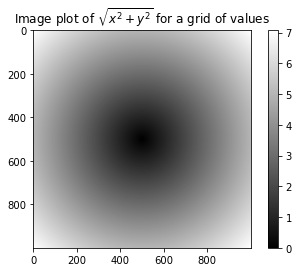

In [30]:
plt.imshow(z,cmap=plt.cm.gray)
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.colorbar()

In [31]:
a=[1,2,3]
b=[2,3,4]

## 将条件逻辑表述为数组运算

In [39]:
xarr=np.array(np.arange(1.1,1.6,0.1))

In [40]:
xarr

array([1.1, 1.2, 1.3, 1.4, 1.5])

In [41]:
yarr=np.array(np.arange(2.1,2.6,0.1))

In [42]:
yarr

array([2.1, 2.2, 2.3, 2.4, 2.5])

In [43]:
cond = np.array([True, False, True, True, False])

假设我们想要根据cond中的值选取xarr和yarr的值：  
当cond中的值为True时，选取xarr的值，否则从yarr中选取

In [44]:
result=[(x if c else y) for x,y,c in zip(xarr,yarr,cond)]

In [45]:
result

[1.1, 2.2, 1.3000000000000003, 1.4000000000000004, 2.5000000000000004]

这有几个问题。第一，它对大数组的处理速度不是很快（因为所有工作都是由纯Python完成的）。第二，无法用于多维数组。若使用np.where，则可以将该功能写得非常简洁

In [46]:
result=np.where(cond,xarr,yarr)

In [47]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

np.where第二和第三参数不必是数组,可以是标量值  
where通常用作根据另一个数组产生新的数组  
下面这个例子将正数替换为2 负数替换为-2

In [48]:
arr=np.random.randn(4,4)

In [49]:
arr

array([[ 1.0926597 , -0.56438697, -0.77711338, -0.39383858],
       [-1.233316  ,  0.82441711,  0.68627145,  0.33066645],
       [-0.29091134,  0.44308041,  1.81680695, -0.86370786],
       [ 0.39540743,  0.35319912,  1.03679173, -0.00956507]])

In [50]:
arr>0

array([[ True, False, False, False],
       [False,  True,  True,  True],
       [False,  True,  True, False],
       [ True,  True,  True, False]])

In [51]:
np.where(arr>0,2,-2)

array([[ 2, -2, -2, -2],
       [-2,  2,  2,  2],
       [-2,  2,  2, -2],
       [ 2,  2,  2, -2]])

将标量和数组结合起来  
将2替换arr中所有正的值

In [52]:
np.where(arr>0,2,arr)

array([[ 2.        , -0.56438697, -0.77711338, -0.39383858],
       [-1.233316  ,  2.        ,  2.        ,  2.        ],
       [-0.29091134,  2.        ,  2.        , -0.86370786],
       [ 2.        ,  2.        ,  2.        , -0.00956507]])

## 数学和统计方法

In [54]:
arr=np.random.rand(5,4)

In [55]:
arr

array([[0.23686292, 0.73188868, 0.03894908, 0.04423177],
       [0.72487305, 0.38541231, 0.61679649, 0.74470564],
       [0.01435294, 0.23022134, 0.88407152, 0.55913285],
       [0.83139823, 0.78700011, 0.64434072, 0.71080606],
       [0.19417466, 0.56845957, 0.92694043, 0.81125098]])

In [56]:
arr.mean()

0.5342934676949984

In [58]:
np.mean(arr)

0.5342934676949984

In [59]:
arr.sum()

10.685869353899967

In [60]:
np.sum(arr)

10.685869353899967

mean和sum这类函数还可以接受一个axis(轴心)选项参数  
用于计算该轴向上的统计值  
最终结果是少一个维度的数组

In [61]:
arr.mean(axis=1) # 计算行的平均值

array([0.26298311, 0.61794687, 0.42194467, 0.74338628, 0.62520641])

In [62]:
arr.sum(axis=0) # 计算每列的和

array([2.00166181, 2.702982  , 3.11109824, 2.87012731])

In [64]:
arr=np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [66]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [68]:
arr=np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [69]:
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [70]:
arr.cumsum(axis=0) # 二维数组列方向上累加求和

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [71]:
arr.cumprod(axis=1) # 二维数组行方向上累乘

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

## 用于布尔型数组的方法

In [78]:
arr=np.random.randn(100)
arr

array([ 0.52328838,  1.61628389,  1.06162615,  0.4589437 ,  0.58293017,
       -0.74988105,  1.75194823,  0.79942136,  0.44653301,  1.12484841,
       -1.32417997,  0.66630506,  0.90317811, -1.10064424, -1.47146875,
        0.4912175 , -2.70416064, -0.52355808, -0.81910865,  0.51390936,
        0.17025585, -0.18046836,  0.60057488,  0.14291074, -0.47204237,
        0.31173764,  0.14342999, -2.11218817,  0.29239591,  0.28215556,
        0.33098369,  0.46347502,  0.63641493, -0.25019076, -1.09740257,
        0.7139063 ,  1.81216744,  0.53996486, -1.18791519, -0.18705382,
       -1.15536019,  1.27082049, -0.5852869 , -0.84093396,  0.99496258,
       -1.46630305, -0.44636912, -1.0852908 , -0.60194135,  2.37287345,
        0.15414287,  0.34390684,  0.32973852, -0.64414099, -1.06384499,
       -0.42743687,  0.59061076, -0.33282472, -0.58393309,  0.97881659,
        0.48654804, -0.57668014, -2.21165609, -2.06944223, -1.40364345,
        1.99999274, -1.14510519,  0.57068524,  0.41707358,  0.90

In [80]:
(arr>0).sum() # 大于0数字的数目

54

any用于检测数组中是否有True  
all用于检测数组中是否都是True

In [81]:
 bools = np.array([False, False, True, False])

In [82]:
bools.any()

True

In [83]:
bools.all()

False

any和all也可以用于非布尔型数组  
所有非0数都会被当作True

In [84]:
arr=np.random.randn(10)
arr

array([ 1.058309  ,  0.44510519,  1.1136681 ,  0.14751272,  0.58199764,
       -0.15441866, -0.65367872,  0.43168458, -0.24301919,  0.857795  ])

In [85]:
arr.any()

True

In [87]:
arr.all() # 没有非0数 全为真

True

## 排序

In [89]:
arr=np.random.randn(6)
arr

array([ 1.16356395, -0.3423464 ,  2.31557471,  0.41864039,  0.12881423,
       -0.76188326])

In [90]:
arr.sort()

In [91]:
arr

array([-0.76188326, -0.3423464 ,  0.12881423,  0.41864039,  1.16356395,
        2.31557471])

当然对于多维数组也可以进行排序  
只需将轴编号传给sort即可  
0 按列 1 按行

In [92]:
arr=np.random.randn(5,3)
arr

array([[ 1.31533059, -2.27392529,  0.72561366],
       [-1.9989463 ,  0.17468539,  0.99763539],
       [-0.77705111,  0.54668989,  2.20224742],
       [-0.76624535,  1.45528195,  0.32309735],
       [-0.01047544,  0.80840333,  0.02677603]])

In [95]:
arr.sort(1) # 1为按行排序

In [96]:
arr

array([[-2.27392529,  0.72561366,  1.31533059],
       [-1.9989463 ,  0.17468539,  0.99763539],
       [-0.77705111,  0.54668989,  2.20224742],
       [-0.76624535,  0.32309735,  1.45528195],
       [-0.01047544,  0.02677603,  0.80840333]])

In [97]:
arr.sort(0) # 0为按列排序
arr

array([[-2.27392529,  0.02677603,  0.80840333],
       [-1.9989463 ,  0.17468539,  0.99763539],
       [-0.77705111,  0.32309735,  1.31533059],
       [-0.76624535,  0.54668989,  1.45528195],
       [-0.01047544,  0.72561366,  2.20224742]])

就地排序会修改数组本身  
计算数组分位数的最好办法就是对其本身进行排序  
然后选取特性位置的值

In [98]:
large_arr=np.random.randn(1000)

In [99]:
large_arr.sort()

In [100]:
large_arr[int(0.05*len(large_arr))] # 计算5%分位数

-1.6434520673934303

## 唯一化及其他的集合逻辑

In [108]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [109]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [110]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [111]:
np.unique(ints)

array([1, 2, 3, 4])

在python中与之等价的代码为

In [112]:
sorted(set(names))

['Bob', 'Joe', 'Will']

In [113]:
values=np.array([6, 0, 0, 3, 2, 5, 6])

in1d(x,y) 表示x的元素是否包含在y的布尔型数组

In [114]:
np.in1d(values,[2,3,6]) # 检测values中的元素是否在2,3,6中

array([ True, False, False,  True,  True, False,  True])

# 用于数组的文件的输入输出

In [115]:
arr=np.arange(10)

In [117]:
np.save('some_array',arr) # 保存为二进制文件

In [118]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

np.savez可以将多个数组保存到一个未压缩的文件中  
数组以关键字形式传入

In [119]:
np.savez('array_archive.npz',a=arr,b=arr)

In [120]:
arch=np.load('array_archive.npz')

In [121]:
arch['b'] # 利用关键字读取数组

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [122]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [126]:
np.savez_compressed('arrays_compressed.npz',a=arr,b=arr)

# 线性代数

In [127]:
x=np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [128]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [129]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

两矩阵的点积

In [130]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [131]:
np.dot(x,y)

array([[ 28.,  64.],
       [ 67., 181.]])

二维数组与大小合适的一维数组的点积为一个一维数组

In [132]:
np.dot(x,np.ones(3))

array([ 6., 15.])

@符号也可以用于矩阵乘法 作为中缀运算符

In [133]:
x@np.ones(3)

array([ 6., 15.])

In [134]:
from numpy.linalg import inv,qr

In [145]:
x=np.random.randn(5,5)

In [146]:
mat=x.T.dot(x) # x和它转置x.T的点积

In [147]:
inv(mat) # 矩阵的逆

array([[ 2.19870221,  1.65029424,  0.80601071, -9.19275651, -5.18053143],
       [ 1.65029424,  1.87832531,  0.93731079, -8.80884484, -4.75360884],
       [ 0.80601071,  0.93731079,  0.76034105, -4.87569341, -2.80200473],
       [-9.19275651, -8.80884484, -4.87569341, 46.44464998, 25.84358151],
       [-5.18053143, -4.75360884, -2.80200473, 25.84358151, 14.9314579 ]])

In [148]:
mat.dot(inv(mat)) # A*A-1=E(单位矩阵)

array([[ 1.00000000e+00,  2.71725248e-16,  3.42898729e-16,
         3.45886820e-16, -6.71511488e-16],
       [-2.55704371e-15,  1.00000000e+00,  2.17792984e-16,
         5.10787091e-15, -6.87753855e-15],
       [ 2.95937169e-16, -1.43422509e-16,  1.00000000e+00,
         5.29082501e-16,  1.86325171e-15],
       [-1.39147230e-15, -1.06034028e-15, -9.34934275e-17,
         1.00000000e+00, -1.22181683e-16],
       [ 2.35306559e-15,  2.33770693e-15,  2.85745264e-16,
        -4.70861698e-15,  1.00000000e+00]])

In [140]:
q,r=qr(mat) # 计算QR分解,分解为一个正交矩阵和一个上三角矩阵的乘积

In [141]:
r

array([[-7.3565224 , -1.30273122, -0.56097399, -1.56963818,  1.72558856],
       [ 0.        , -4.05342331,  4.36061916, -2.52096045, -2.93467773],
       [ 0.        ,  0.        , -0.22141946, -1.59125297, -0.4832577 ],
       [ 0.        ,  0.        ,  0.        , -5.821091  , -3.74999469],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.3007741 ]])

In [142]:
q

array([[-0.94500059,  0.01848713,  0.31359015, -0.05194774,  0.07479816],
       [-0.15715926, -0.65862669, -0.4885611 ,  0.31994411,  0.44772276],
       [-0.07358111,  0.68375227, -0.41681361, -0.08777526,  0.58790355],
       [-0.16857081, -0.14862822, -0.53985408, -0.73610254, -0.34088731],
       [ 0.22010124, -0.27615503,  0.44473954, -0.58769529,  0.57629404]])

# 伪随机数生成

生成一个标准正态分布4x4样本数组

In [150]:
samples=np.random.normal(size=(4,4))

In [151]:
samples

array([[-0.67442458, -0.34109168,  0.28025386,  0.77207726],
       [-0.24775261,  1.49138531, -0.73558652,  1.11758169],
       [-0.18825473, -1.55065804,  0.39564927, -0.94819177],
       [ 1.04032099,  0.62018928, -0.04859182, -0.50554432]])

numpy.random比python内置的random模块速度快得多

In [152]:
from random import normalvariate

In [153]:
N=1000000

In [154]:
%timeit samples = [normalvariate(0,1) for _ in range(N)]

827 ms ± 24.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [155]:
%timeit np.random.normal(size=N)

26.2 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [156]:
np.random.seed(1234)

numpy.random的数据生成函数使用了全局的随机种子。要避免全局状态，你可以使用numpy.random.RandomState，创建一个与其它隔离的随机数生成器

In [157]:
rng=np.random.RandomState(1234)

In [158]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

# 随机漫步

纯python形式实现随机漫步

In [7]:
import random
import matplotlib.pyplot as plt

In [31]:
position = 0
walk = [position] # 申请walk list初始值为0
steps = 1000
for i in range(steps):
    step=1 if random.randint(0,1) else -1
    position+=step
    walk.append(position)

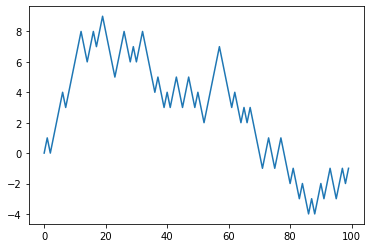

In [32]:
plt.plot(walk[:100])

In [36]:
arr_int=[]
for i in range(10):
    arr_int.append(random.randint(0,2))

arr_int

[2, 0, 2, 0, 2, 1, 2, 0, 2, 2]

In [23]:
nsteps=1000
draws=np.random.randint(0,2,size=nsteps)

In [24]:
steps=np.where(draws>0,1,-1)

In [26]:
walk=steps.cumsum()

In [28]:
walk.max()

40

In [29]:
walk.min()

-8

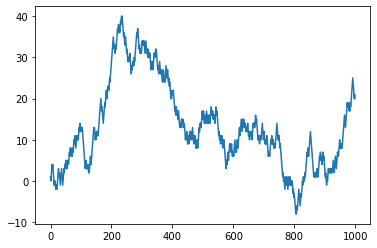

In [30]:
plt.plot(walk)

argmax返回数组第一个最大值的索引  
事实上通常情况下argmax并不高效,他要扫描完整个数组  
但在布尔数组中只要出现第一个True就是第一个最大值的位置

In [34]:
(np.abs(walk)>=10).argmax()

116

## 一次模拟多个随机漫步

In [35]:
nwalks=5000
nsteps=1000

In [37]:
draws=np.random.randint(0,2,size=(nwalks,nsteps))

In [38]:
steps=np.where(draws>0,1,-1)

In [39]:
walks=steps.cumsum(1) # 行方向求累加和

In [42]:
walks

array([[  1,   2,   1, ...,   6,   7,   8],
       [  1,   2,   1, ...,  30,  29,  28],
       [  1,   2,   3, ..., -58, -57, -58],
       ...,
       [ -1,  -2,  -3, ..., -72, -73, -74],
       [ -1,  -2,  -3, ..., -10, -11, -12],
       [  1,   0,   1, ...,  -8,  -7,  -8]], dtype=int32)

In [43]:
walks.max()

113

In [44]:
walks.min()

-118

any()将一个序列转换为布尔型序列

In [45]:
hits30=(np.abs(walks)>=30).any(1)

In [46]:
hits30

array([False,  True,  True, ...,  True, False, False])

In [47]:
hits30.sum() # 到达30或-30的个数

3365

穿越时间=第一次到达30或-30的下标

In [48]:
crossing_times=(np.abs(walks[hits30])>=30).argmax(1)

In [49]:
crossing_times.mean()

498.5625557206538

利用正态分布生成漫步数据

In [81]:
steps=np.random.normal(loc=0,scale=0.25,size=(nwalks,nsteps))

In [82]:
steps

array([[-0.15751105,  0.27392977,  0.01361626, ..., -0.13907296,
         0.20335734,  0.17402043],
       [-0.16159844, -0.01076752, -0.03794927, ..., -0.21114799,
         0.38208458, -0.0133914 ],
       [-0.23776528, -0.15334532, -0.01544395, ...,  0.10110303,
         0.10165825, -0.01310839],
       ...,
       [ 0.11564532, -0.2722125 , -0.09810596, ...,  0.05715131,
        -0.17476101, -0.27898423],
       [ 0.57068162,  0.18824196, -0.11797757, ..., -0.04315055,
        -0.02924978, -0.1896612 ],
       [ 0.23190594, -0.18698875, -0.2622474 , ..., -0.0636114 ,
         0.37755828,  0.15250836]])

In [65]:
steps.min()

-1.29391030512682

In [66]:
steps.max()

1.3470723432194942

In [83]:
steps=np.where(steps>0,1,-1)

In [84]:
steps

array([[-1,  1,  1, ..., -1,  1,  1],
       [-1, -1, -1, ..., -1,  1, -1],
       [-1, -1, -1, ...,  1,  1, -1],
       ...,
       [ 1, -1, -1, ...,  1, -1, -1],
       [ 1,  1, -1, ..., -1, -1, -1],
       [ 1, -1, -1, ..., -1,  1,  1]])

In [85]:
walks=steps.cumsum(1)

In [88]:
walks

array([[ -1,   0,   1, ..., -38, -37, -36],
       [ -1,  -2,  -3, ...,  12,  13,  12],
       [ -1,  -2,  -3, ...,   6,   7,   6],
       ...,
       [  1,   0,  -1, ...,  -8,  -9, -10],
       [  1,   2,   1, ...,  26,  25,  24],
       [  1,   0,  -1, ..., -42, -41, -40]], dtype=int32)

In [86]:
walks.min()

-110

In [87]:
walks.max()

104

In [89]:
hits30=(np.abs(walks)>=30).any(1)

In [90]:
hits30

array([ True, False, False, ...,  True,  True,  True])

In [92]:
hits30.sum()

3379

In [93]:
crossing_times=(np.abs(walks[hits30])>=30).argmax(1)

In [95]:
crossing_times

array([949, 485, 363, ..., 209, 481, 655], dtype=int64)

In [94]:
crossing_times.mean()

495.25096182302457